In [13]:
#set path and get data for colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
    #get the data
    !git clone https://github.com/keuperj/DataScience20Data.git
    !mv DataScience20Data/* .
    


<center>
<img src="IMG/BigMarket.jpg" width=600>
<br>
    <h3>Data Science SS20 - Janis Keuper</h3>
</center>

<a id = "#initialization"></a>
<h2>Initializing Packages and Importing Data</h2>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

train = pd.read_csv("../DATA/big-mart-sales-dataset/Train.csv") 
test = pd.read_csv("../DATA/big-mart-sales-dataset/Test.csv") 

## BigMarket Data Set - An intuitive walk through
* **Important: this is a black-box introduction**
* you **DO NOT** need to understand every detail at this point
* focus on the overall workflow...

## Recal the Phases of a typical Data Science Workflow
<center>
<br>
 <img src="IMG/workflow.png">
</center>


## Initial Working Hypothesis 
* What is the target (variable) ?
* What data would we expect ?
* What domain knowledge do we need ?


<center>
<img src="IMG/effects.png" width=1000>
[2]
<center>

<a id = "#viewdata"></a>
<h2>But let's take a peak at our data first</h2>

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


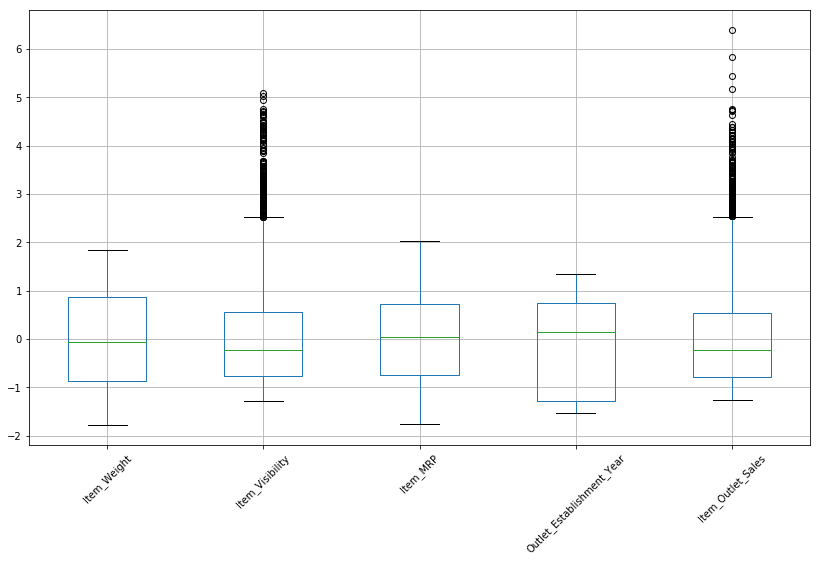

In [6]:
train_num = train._get_numeric_data()
train_num = (train_num - train_num.mean() ) / train_num.std()
train_num.boxplot(rot=45, figsize=(14,8))

In [7]:
#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


<h2>1. Exploratory Data Analysis (EDA)</h2>

<h3>1.1. Univariate Distribution</h3>
<h4>1.1.1.  Distribution of the target variable : Item_Outlet_Sales</h4>

In [ ]:
def plot1():
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,7))
    sns.distplot(train.Item_Outlet_Sales, bins = 25)
    plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
    plt.xlabel("Item_Outlet_Sales")
    plt.ylabel("Number of Sales")
    plt.title("Item_Outlet_Sales Distribution")

In [8]:
plot1() #plot sales by item

NameError: name 'plot1' is not defined

In [ ]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

<h4>1.1.2. Numerical Variables</h4>


In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

In [ ]:
numeric_features.corr()

In [ ]:
corr = numeric_features.corr()

print (corr['Item_Outlet_Sales'].sort_values(ascending=False))

In [ ]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

<h4>1.1.3. Categorical Variables</h4>
<h5>1.1.3.1. Distribution of the Item_Fat_Content</h5>

In [ ]:
train.Item_Fat_Content.value_counts()

In [ ]:
sns.countplot(train.Item_Fat_Content)


<h5>1.1.3.2. Distribution of the Item_Type</h5>

In [ ]:
train.Item_Type.value_counts()

In [ ]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

<h5>1.1.3.3. Distribution of the Outlet_Size</h5>

In [ ]:
train.Outlet_Size.value_counts()

In [ ]:
sns.countplot(train.Outlet_Size)

<h5>1.1.3.4. Distribution of the Outlet_Location_Type</h5>

In [ ]:
train.Outlet_Location_Type.value_counts()

In [ ]:
sns.countplot(train.Outlet_Location_Type)

<h5>1.1.3.5. Distribution of the Outlet_Type</h5>

In [ ]:
train.Outlet_Type.value_counts()

In [ ]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

<h3>1.2. Bivariate Distribution</h3>
<h4>1.2.1. Numerical Variables</h4>
<h5>1.2.1.1. Item_Weight and Item_Outlet_Sales Analysis</h5>

In [ ]:
def plot2():
    plt.figure(figsize=(12,7))
    plt.xlabel("Item_Weight")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Item_Weight and Item_Outlet_Sales Analysis")
    plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

In [ ]:
plot2()

<h5>1.2.1.2. Item_Visibility and Item_Outlet_Sales Analysis</h5>

In [ ]:
def plot3():
    plt.figure(figsize=(12,7))
    plt.xlabel("Item_Visibility")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
    plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

In [ ]:
plot3()

<h5>1.2.1.3. Item_MRP and Item_Outlet_Sales Analysis</h5>

In [ ]:
def plot4():
    plt.figure(figsize=(12,7))
    plt.xlabel("Item_MRP")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Item_MRP and Item_Outlet_Sales Analysis")
    plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.3)

In [ ]:
plot4()

<h5>1.2.1.4. Outlet_Establishment_Year and Item_Outlet_Sales Analysis</h5>

In [ ]:
def plot5():
    Outlet_Establishment_Year_pivot = \
    train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

    Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Outlet_Establishment_Year")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plot5()

<h4>1.2.2. Categorial Variables</h4>

In [ ]:
numeric_features = train.select_dtypes(include=[np.object])
numeric_features.dtypes

<h5>1.2.2.1. Impact of Item_Identifier on Item_Outlet_Sales</h5>

In [ ]:
def plot6():
    plt.figure(figsize=(12,7))
    plt.xlabel("Item_Identifier")
    plt.ylabel("SQRT Item_Outlet_Sales")
    plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
    plt.plot(train.Item_Identifier , train["Item_Outlet_Sales"],'.', alpha = 0.3)

In [ ]:
plot6()

<h5>1.2.2.2. Impact of Item_Fat_Content on Item_Outlet_Sales</h5>


In [ ]:
def plot7():
    Item_Fat_Content_pivot = \
    train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

    Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Item_Fat_Content")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plot7()

<h5>1.2.2.3. Impact of Outlet_Identifier on Item_Outlet_Sales</h5>

In [ ]:
def plot8():
    Outlet_Identifier_pivot = \
    train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

    Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Outlet_Identifier ")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plot8()

In [ ]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

In [ ]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

<h5>1.2.2.4. Impact of Outlet_Size on Item_Outlet_Sales</h5>

In [ ]:
def plot9():
    Outlet_Size_pivot = \
    train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
    Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Outlet_Size ")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plot9()

<h5>1.2.2.5. Impact of Outlet_Location_Type on Item_Outlet_Sales</h5>

In [ ]:
def plot10():
    Outlet_Location_Type_pivot = \
    train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

    Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Outlet_Location_Type ")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plot10()

In [ ]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

<h5>1.2.2.6. Impact of Outlet_Type on Item_Outlet_Sales</h5>

In [ ]:
def plot11():
    Outlet_Type_pivot = \
    train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

    Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Outlet_Type ")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plot11()

<h5>1.2.2.7. Impact of Item_Type on Item_Outlet_Sales</h5>

In [ ]:
def plot12():
    pivoTable = \
    train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

    pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Item_Type ")
    plt.ylabel("Item_Outlet_Sales")
    plt.title("Impact of Item_Type on Item_Outlet_Sales")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
plot12()

<h5>1.2.2.8. Impact of Item_Type vs Item_Visibility</h5>

In [ ]:
def plot13():
    pivoTable = \
    train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

    pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel("Item_Type ")
    plt.ylabel("Item_Visibility")
    plt.title("Item_Type vs Item_Visibility")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
plot13()

<h2>2. Data Pre-Processing</h2>

<h3> 2.1. Looking for missing values</h3>

In [ ]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv("../DATA/big-mart-sales-dataset/data.csv",index=False)
print(train.shape, test.shape, data.shape)

<h3> 2.2. Imputing Missing Values </h3>

In [ ]:
 #aggfunc is mean by default! Ignores NA by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

In [ ]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [ ]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

<h3> 2.3. Imputing Outlet_size with the mode</h3>


In [ ]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

In [ ]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

<h2>3. Feature Engineering</h2>

<h4> 3.1. Should we combine Outlet_Type?</h4>


In [ ]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

<h4> 3.2. Item_Visibility minimum value 0</h4>

In [ ]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [ ]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

<h4> 3.3. Determine the years of operation of a store</h4>


In [ ]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

<h4> 3.4. Create a broad category of Type of Item</h4>

In [ ]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

<h4> 3.5. Modify categories of Item_Fat_Content</h4>


In [ ]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

In [ ]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

<h2>4. Feature Transformations</h2>

<h4> 4.1. Creating variable Item_Visibility_MeanRatio</h4>

In [ ]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

<h4> 4.2. Numerical and Categorical Variables – Dummy variables</h4>

In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [ ]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                                     'Item_Type_Combined','Outlet'])

data.dtypes

<h4> 4.3. Exporting Data</h4>


In [ ]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("../DATA/big-mart-sales-dataset/train_modified.csv",index=False)
test.to_csv("../DATA/big-mart-sales-dataset/test_modified.csv",index=False)

### Have a look at the final data

In [ ]:
train.head()

<h2>5. Model, predict and solve the problem</h2>
<li> Find a (machine learning) model for the prediction target
<li> How to evaluate this model?
<li> When is the problem "solved"?

In [ ]:
train_df = pd.read_csv('../DATA/big-mart-sales-dataset/train_modified.csv')
test_df = pd.read_csv('../DATA/big-mart-sales-dataset/test_modified.csv')

In [ ]:
train_df.head()

In [ ]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

<h3>
Linear Regression Model
</h3>
<li>very simple linear model
<li>fit "hyper-plane" to data points
<li>basic: least-squares optimization
<center>
<img src="IMG/lr.png" width=600>
[wikipedia]
<center>    

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()

In [ ]:
#print model coefficients
coef1.plot(kind='bar', title='Model Coefficients', figsize=(12,8))

<h3>
Random Forest Model
</h3>
<li> a much more complex model... (to be explained later)

In [ ]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)

In [ ]:
coef4.plot(kind='bar', title='Feature Importances', figsize=(10,5))

# Discussion: What is next ?

### Much to learn :-)

### Let's start with Python!

In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
path = "~/anaconda3/envs/rise_latest/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "sky",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "width": 1200,
              "height": 800,
              "header": "<h1>Data Science - Use Case: BigMarket </h1>", 
              "footer": "<h3>Janis Keuper - HS Offenburg, SS20</h3>"
})